# **Mobile Price Analysis**

# **Data Loading and Exploration**

In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# **Data Cleaning and Preprocessing:**

In [5]:
missing_ratios = data.isna().mean()
print(missing_ratios)

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64


In [8]:
missing_data=data.isnull().sum()
print(missing_data)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [6]:
print(data.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [7]:
data=data.drop_duplicates()
print(data.duplicated().sum())


0


In [9]:
#target= price_range
#features= all the rest of the columns

In [10]:
#taking out outliers

for column in ['battery_power']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for column in ['px_height']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for column in ['px_width']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for column in ['ram']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   int64  
 1   blue           1998 non-null   int64  
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   int64  
 4   fc             1998 non-null   int64  
 5   four_g         1998 non-null   int64  
 6   int_memory     1998 non-null   int64  
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   int64  
 9   n_cores        1998 non-null   int64  
 10  pc             1998 non-null   int64  
 11  px_height      1998 non-null   int64  
 12  px_width       1998 non-null   int64  
 13  ram            1998 non-null   int64  
 14  sc_h           1998 non-null   int64  
 15  sc_w           1998 non-null   int64  
 16  talk_time      1998 non-null   int64  
 17  three_g        1998 non-null   int64  
 18  touch_screen 

In [15]:
#correlation
correlation = data.corr()['price_range'].sort_values(ascending=False)
print(correlation)

price_range      1.000000
ram              0.917273
battery_power    0.200569
px_width         0.164611
px_height        0.146936
int_memory       0.043795
sc_w             0.037874
pc               0.034361
three_g          0.023125
fc               0.022285
sc_h             0.021963
talk_time        0.021182
blue             0.019688
wifi             0.017920
dual_sim         0.017031
four_g           0.013927
n_cores          0.004019
m_dep            0.000936
clock_speed     -0.005791
mobile_wt       -0.029457
touch_screen    -0.029988
Name: price_range, dtype: float64


In [16]:
#we can see a very big and positive relation between ram and our target variable (price)
#this means that if the ram is bigger, price becomes also bigger
#we dont see any variable like dates so there is no need to change any data type

# **Statistical Analysis with NumPy and SciPy**

In [28]:
import numpy as np
#mean
mean_battery_power = np.mean(data['battery_power'])
print(mean_battery_power)
#median
median_battery_power = np.median(data['battery_power'])
print(median_battery_power)
#mode
mode_battery_power = stats.mode(data['battery_power'])
print(mode_battery_power)

#range
range_battery_power = np.max(data['battery_power']) - np.min(data['battery_power'])
print(range_battery_power)

#standard deviation
std_battery_power = np.std(data['battery_power'])
print(std_battery_power)

#variance
var_battery_power = np.var(data['battery_power'])
print(var_battery_power)

import scipy.stats as stats
numerical_data = data.select_dtypes(include=['int64','float64'])
skewness = stats.skew(numerical_data)
kurtosis = stats.kurtosis(numerical_data)
print(kurtosis)
print(skewness)

#mean with scipy
mean_battery_power = stats.tmean(data['battery_power'])
print(mean_battery_power)


261.14354354354356
1225.0
ModeResult(mode=618, count=6)
1497
439.51077382231654
193169.72030589147
[-1.22556754 -1.99951497 -1.32378298 -1.99855258  0.27070054 -1.99291735
 -1.21576946 -1.27491905 -1.20984324 -1.22996823 -1.17112188 -0.34281215
 -1.18552436 -1.19245338 -1.18999363 -0.39441805 -1.21834498 -0.49771129
 -1.99985571 -1.99932253 -1.35999705]
[ 0.03239805  0.02202336  0.1773183  -0.03804492  1.01818683 -0.08415849
  0.05974253  0.08937234  0.0046      0.00492655  0.01563075  0.65710036
  0.01510205  0.00691348 -0.09721497  0.63225602  0.01140112 -1.22567888
 -0.01201223 -0.02602823  0.00143252]
1238.4354354354355


In [34]:
#mean for all columns
for column in data.select_dtypes(include=['number']).columns:
    mean_value = np.mean(data[column])
    print(column, mean_value)

for column in data.select_dtypes(include=['number']).columns:
    median_value = np.median(data[column])
    print(column, median_value)

for column in data.select_dtypes(include=['number']).columns:
    std_value = np.std(data[column])
    print(column, std_value)

battery_power 1238.4354354354355
blue 0.4944944944944945
clock_speed 1.5227227227227225
dual_sim 0.5095095095095095
fc 4.311811811811812
four_g 0.521021021021021
int_memory 32.032032032032035
m_dep 0.5017017017017017
mobile_wt 140.28178178178177
n_cores 4.519019019019019
pc 9.922422422422422
px_height 643.7972972972973
px_width 1250.7877877877877
ram 2124.0395395395394
sc_h 12.3013013013013
sc_w 5.76026026026026
talk_time 11.006506506506506
three_g 0.7612612612612613
touch_screen 0.503003003003003
wifi 0.5065065065065065
price_range 1.498998998998999
battery_power 1225.0
blue 0.0
clock_speed 1.5
dual_sim 1.0
fc 3.0
four_g 1.0
int_memory 32.0
m_dep 0.5
mobile_wt 141.0
n_cores 4.0
pc 10.0
px_height 564.0
px_width 1247.0
ram 2146.5
sc_h 12.0
sc_w 5.0
talk_time 11.0
three_g 1.0
touch_screen 1.0
wifi 1.0
price_range 1.0
battery_power 439.51077382231654
blue 0.49996968849033585
clock_speed 0.8158859381422471
dual_sim 0.49990956104968326
fc 4.341453539940338
four_g 0.4995579212416129
int_memo

In [37]:
#take battery_power array filtering price_range of 0 and 1
battery_power_first = data[(data['price_range'] == 0) | (data['price_range'] == 1)]['battery_power']
battery_power_second = data[(data['price_range'] == 2) | (data['price_range'] == 3)]['battery_power']

t_statistic, p_value = stats.ttest_ind(battery_power_first, battery_power_second)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -6.745524124935921
P-value: 1.9906217900356667e-11


# The mean for first group is less than the media of the second group. We can then say that telephone with less price have also less battery_power.
# There is a significant difference between those 2 groups and thats why the very small P-value. The difference in battery power is explained by this

# **After correlation between our target and features we see that RAM is the most correlated (more RAM, higher price). battery is also positive relation with the price, and dimensions of the screen width and height although not so strong correlation**


# **Data Visualization with Matplotlib**

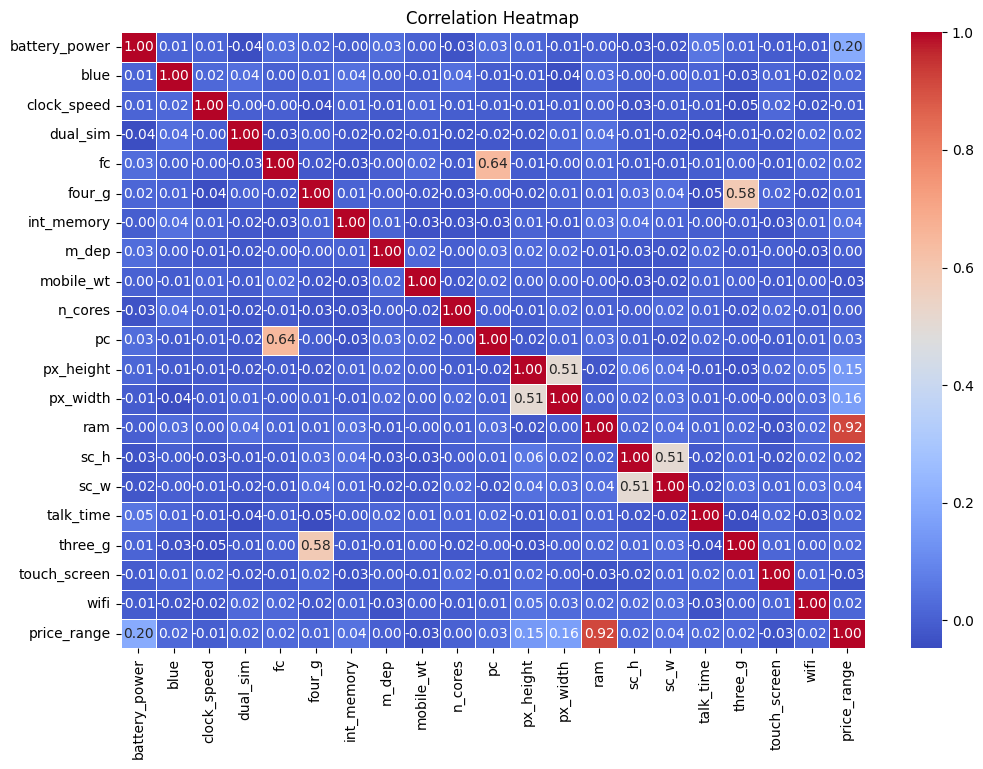

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **here we can see the ram has a very strong correlation with price range of 0.92. We could be also sorprised that the relation with the touch_screen and price range is negative and very low, which means that is not related to the price. Is surprising because new telephones are usually all with touch screen**

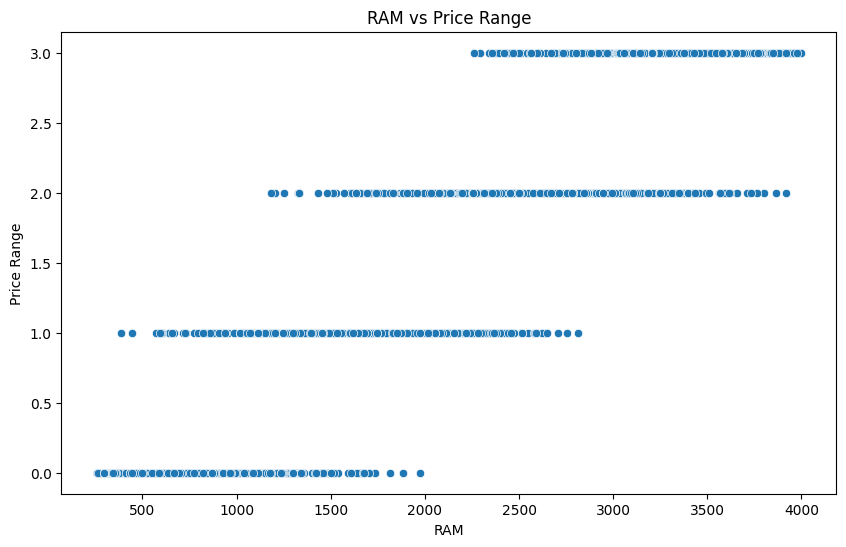

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram', y='price_range', data=data)
plt.title('RAM vs Price Range')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.show()

# **We can see in this graph for more RAM more price_range, which is something we would expect**

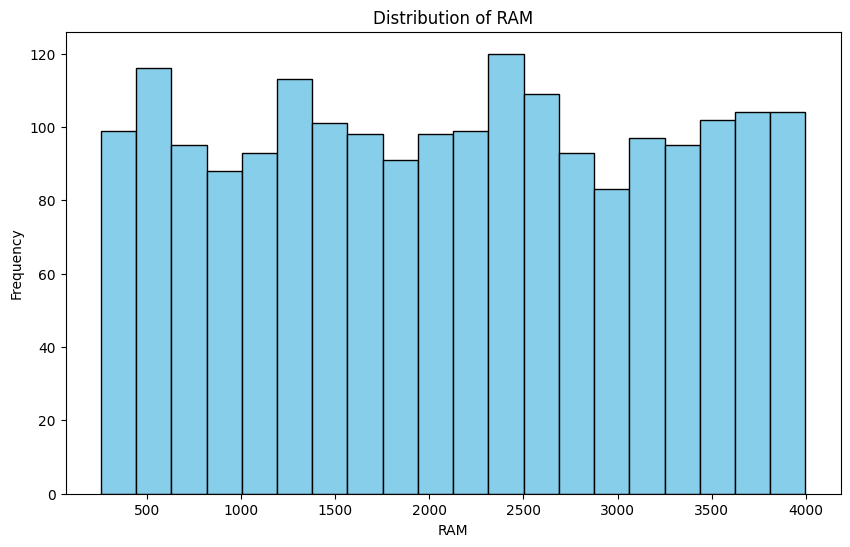

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['ram'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of RAM')
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.show()

# **The histogram of RAM show us the distribuition of the data in RAM without comparing it to price. As we can see, is not a normal distribuition**

<ipython-input-41-c43fbafcdeca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='ram', data=data, palette="Set2")


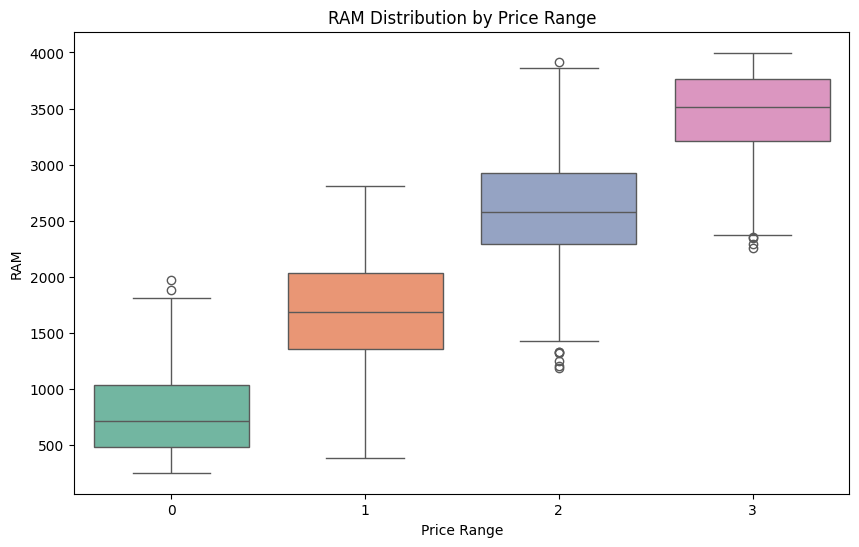

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='ram', data=data, palette="Set2")
plt.title('RAM Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.show()

# **The points that we see outside the boxes are the outliers outside Q1 and Q3. We can see some outliers present in price range 0, 2 and 3. We also see in this graph how for more RAM Price range is higher**